In [40]:
from qsprpred.data.storage.tabular.simple import PandasChemStore
from qsprpred.data.storage.tabular.hierarchical import PandasRepresentationStore
from spock.storage.tabular import SpockStorage
from graphein.molecule import plotly_molecular_graph
from qsprpred.plotting.grid_visualizers import table_to_grid
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from Bio import PDB
import os
import nglview

In [20]:
# load the correct storages from the data folder
store = SpockStorage.fromFile('./data/SpockStorage/meta.json')
library = PandasChemStore.fromFile('./data/ChemStorage/meta.json')
representation_store = PandasRepresentationStore.fromFile('./data/ProtomerStorage/ProtomerStorage/ProtomerStorage_representations/meta.json')

In [21]:
# Initialize mol without printing anything
for mol in library:
    mol.as_rd_mol()
    break

In [22]:
# initialize mol_representation without printing anything
for mol in representation_store:
    if mol.representations and len(mol.representations) > 1:
        break

In [23]:
# get summary to validate the data
store.getSummary()

Path          Name  Molecules  Targets  Poses
0  ./data/SpockStorage  SpockStorage        200        1   6216

/Users/jelle/miniconda3/envs/spock/lib/python3.12/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


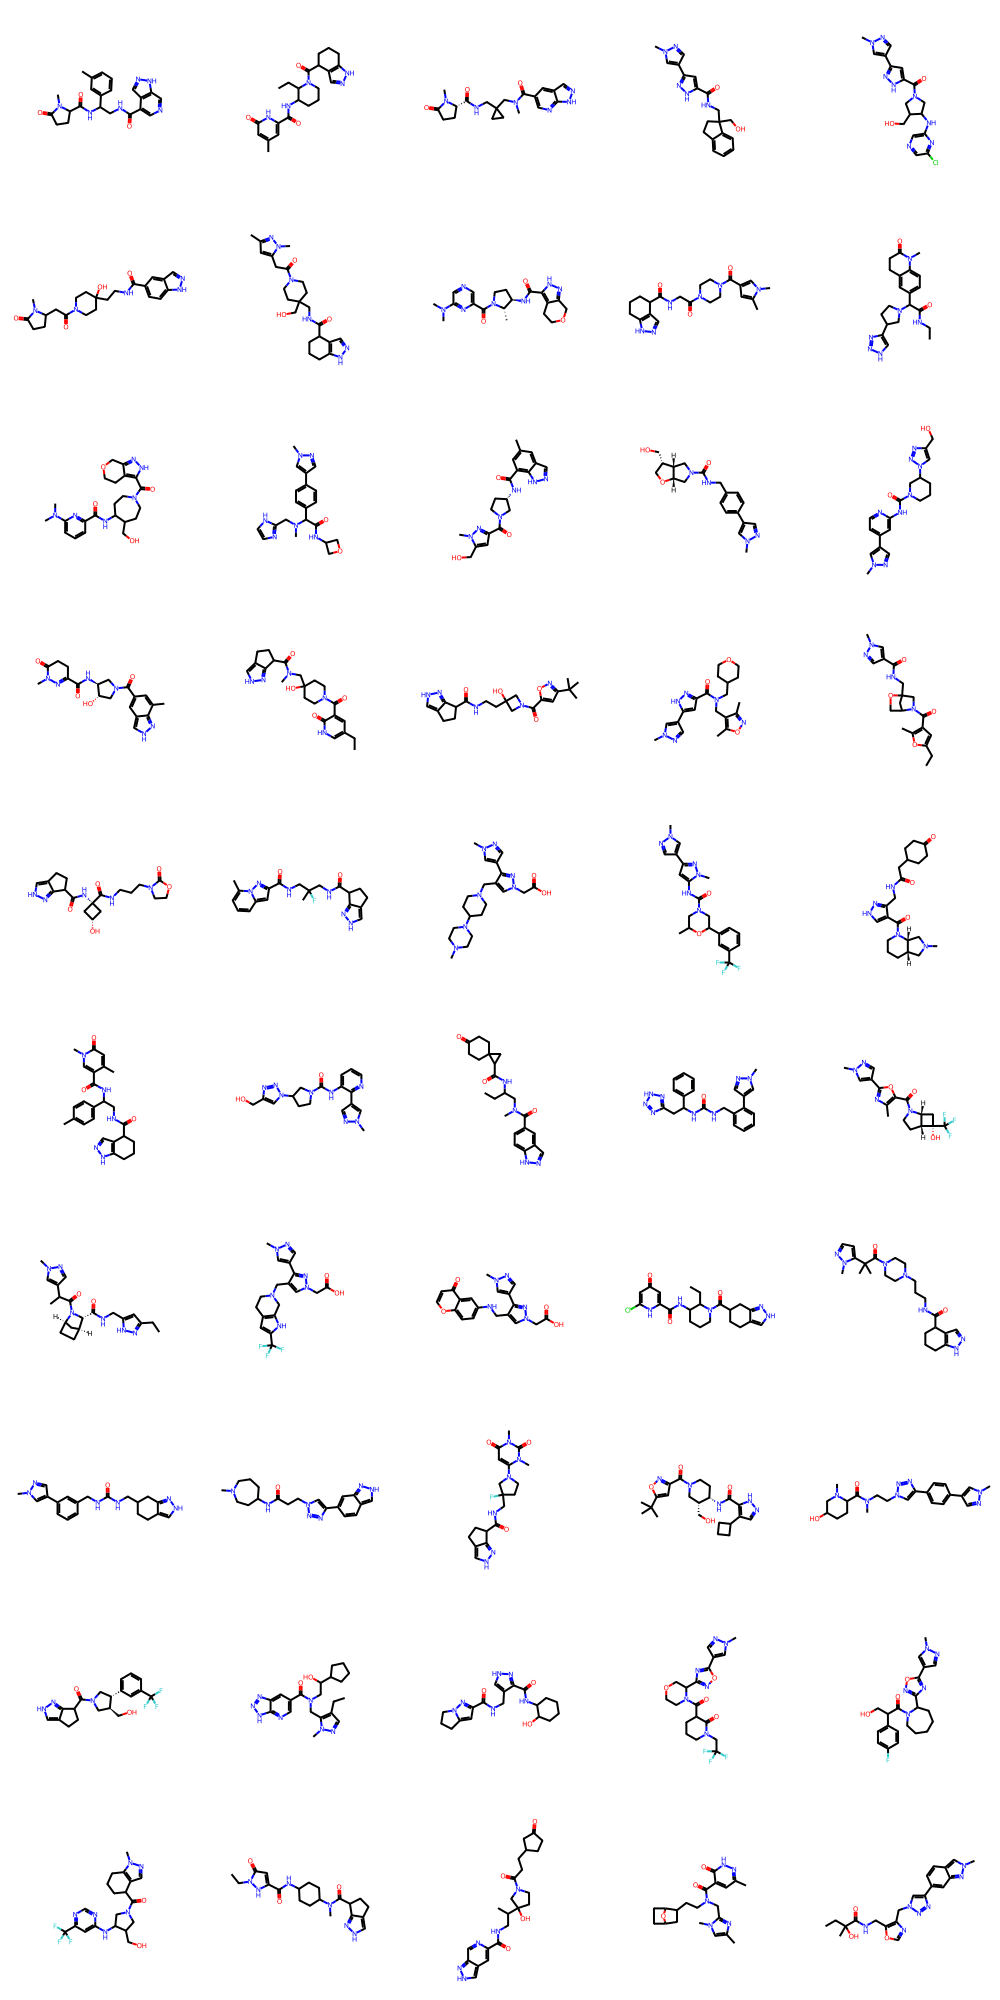

In [24]:
# visualise 2D representation of the molecules
table_to_grid(library)

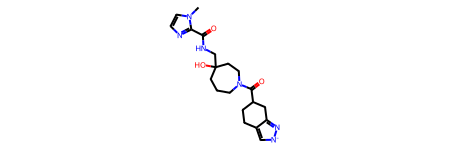

In [12]:
mol.as_rd_mol()

In [ ]:
# get the DF of the store
df = store.getDF().reset_index(drop=True)

In [37]:
# get the df from the promoterstorage
df2 = representation_store.getDF().reset_index(drop=True)

In [38]:
# merge df with df2 on shared column
merged_df = pd.merge(df, df2, left_on='parent_id', right_on='ProtomerStorage_representations_ID', how='inner')
merged_df = merged_df[['parent_id_y', 'ProtomerStorage_representations_ID', 'sdf_x', 'vina_energy_total', 'SMILES_y']]
merged_df = merged_df.rename(columns={'parent_id_y': 'inchikey', 'sdf_x': 'sdf', 'SMILES_y': 'SMILES'})
merged_df

inchikey  \
0     MFMJGLNCJBMDQV-UHFFFAOYSA-N   
1     MFMJGLNCJBMDQV-UHFFFAOYSA-N   
2     MFMJGLNCJBMDQV-UHFFFAOYSA-N   
3     MFMJGLNCJBMDQV-UHFFFAOYSA-N   
4     MFMJGLNCJBMDQV-UHFFFAOYSA-N   
...                           ...   
6211  QYDKMIVTZSTHAU-UHFFFAOYSA-N   
6212  QYDKMIVTZSTHAU-UHFFFAOYSA-N   
6213  QYDKMIVTZSTHAU-UHFFFAOYSA-N   
6214  QYDKMIVTZSTHAU-UHFFFAOYSA-N   
6215  QYDKMIVTZSTHAU-UHFFFAOYSA-N   

                                              ProtomerStorage_representations_ID  \
0     ProtomerStorage_representations_library_57115e6574144bb7a1466bbcd99b6f42_0   
1     ProtomerStorage_representations_library_57115e6574144bb7a1466bbcd99b6f42_0   
2     ProtomerStorage_representations_library_57115e6574144bb7a1466bbcd99b6f42_0   
3     ProtomerStorage_representations_library_57115e6574144bb7a1466bbcd99b6f42_0   
4     ProtomerStorage_representations_library_57115e6574144bb7a1466bbcd99b6f42_0   
...                                                                          ...   
6211  ProtomerStorage_representations_library_b1bd07444df34adb899c9c4b39484d00_4   
6212  ProtomerStorage_representations_library_b1bd07444df34adb899c9c4b39484d00_4   
6213  ProtomerStorage_representations_library_b1bd07444df34adb899c9c4b39484d00_4   
6214  ProtomerStorage_representations_library_b1bd07444df34adb899c9c4b39484d00_4   
6215  ProtomerStorage_representations_library_b1bd07444df34adb899c9c4b39484d00_4   

                                                                                                                                                                                                          sdf  \
0     \n     RDKit          3D\n\n 47 50  0  0  0  0  0  0  0  0999 V2000\n  -10.1990  -24.0640   13.5600 C   0  0  0  0  0  0  0  0  0  0  0  0\n  -11.1000  -22.9030   13.4620 N   0  0  0  0  0  0  0  ...   
1     \n     RDKit          3D\n\n 47 50  0  0  0  0  0  0  0  0999 V2000\n  -10.4240  -22.6260   13.5290 C   0  0  0  0  0  0  0  0  0  0  0  0\n  -11.6220  -21.7910   13.3350 N   0  0  0  0  0  0  0  ...   
2     \n     RDKit          3D\n\n 47 50  0  0  0  0  0  0  0  0999 V2000\n  -12.3380  -25.0230   13.8040 C   0  0  0  0  0  0  0  0  0  0  0  0\n  -11.9310  -23.6220   13.5980 N   0  0  0  0  0  0  0  ...   
3     \n     RDKit          3D\n\n 47 50  0  0  0  0  0  0  0  0999 V2000\n  -11.8330  -24.2190   13.9540 C   0  0  0  0  0  0  0  0  0  0  0  0\n  -11.7860  -22.7830   13.6280 N   0  0  0  0  0  0  0  ...   
4     \n     RDKit          3D\n\n 47 50  0  0  0  0  0  0  0  0999 V2000\n  -11.7800  -26.3140   13.2920 C   0  0  0  0  0  0  0  0  0  0  0  0\n  -11.4160  -24.8940   13.4340 N   0  0  0  0  0  0  0  ...   
...                                                                                                                                                                                                       ...   
6211  \n     RDKit          3D\n\n 60 63  0  0  0  0  0  0  0  0999 V2000\n  -13.5220  -11.6020    9.7380 C   0  0  0  0  0  0  0  0  0  0  0  0\n  -13.6110  -10.8370   10.9450 N   0  0  0  0  0  0  0  ...   
6212  \n     RDKit          3D\n\n 60 63  0  0  0  0  0  0  0  0999 V2000\n   -7.7890  -14.4120   10.2080 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -7.2530  -13.4440   11.1160 N   0  0  0  0  0  0  0  ...   
6213  \n     RDKit          3D\n\n 60 63  0  0  0  0  0  0  0  0999 V2000\n   -6.1420  -12.1300   13.4330 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -6.1100  -13.4900   13.8820 N   0  0  0  0  0  0  0  ...   
6214  \n     RDKit          3D\n\n 60 63  0  0  0  0  0  0  0  0999 V2000\n  -14.6640  -10.1500   10.1600 C   0  0  0  0  0  0  0  0  0  0  0  0\n  -14.6120  -10.9990   11.3120 N   0  0  0  0  0  0  0  ...   
6215  \n     RDKit          3D\n\n 60 63  0  0  0  0  0  0  0  0999 V2000\n   -4.5170  -13.9770   14.5680 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -4.5860  -14.9790   13.5480 N   0  0  0  0  0  0  0  ...   

     vina_energy_total                                        

In [39]:
# Group by 'inchikey', find the row with the lowest 'vina_energy_total' for each group
pd.set_option('display.max_colwidth', 200)
grouped_df = merged_df.loc[merged_df.groupby('inchikey')['vina_energy_total'].idxmin()]
grouped_df['vina_energy_total'] = pd.to_numeric(df['vina_energy_total'])
grouped_df = grouped_df.sort_values(by='vina_energy_total', ascending=True)
grouped_df

inchikey  \
5721  PFGAQKUXFZMIHA-UHFFFAOYSA-N   
1995  SZTRRJRDCDKYKL-XZNKJRRYSA-N   
3111  NKXCZUWGWIYCMO-MXVIHJGJSA-N   
2104  QBXSARFLLRCVIU-UHFFFAOYSA-N   
1826  XXSSZDOGGHXSMM-OXJNMPFZSA-N   
...                           ...   
1472  VXGAYLYNHTZKIU-UHFFFAOYSA-N   
5639  BPVWWBDICTZICD-UHFFFAOYSA-N   
1139  NQIWRDRWLCMZIK-UHFFFAOYSA-N   
6197  QYDKMIVTZSTHAU-UHFFFAOYSA-N   
4316  VQCYKQZQLSLMDM-UHFFFAOYSA-N   

                                              ProtomerStorage_representations_ID  \
5721  ProtomerStorage_representations_library_acd7ae3d3e6841658e67ab47f8824de8_2   
1995  ProtomerStorage_representations_library_07dc2a5690da437bb34203e70e1c13a8_3   
3111  ProtomerStorage_representations_library_60bce612894b49b095ccda46bcfc7876_0   
2104  ProtomerStorage_representations_library_f6f3bfeaaa664e67b5cde8ed6f7159fa_0   
1826  ProtomerStorage_representations_library_9cef4109e61c4722b6edec5c86906e3f_0   
...                                                                          ...   
1472  ProtomerStorage_representations_library_8273ec110ad4454088941bc597771b34_1   
5639  ProtomerStorage_representations_library_5051329d746c496fad5d15b66b45ae4c_1   
1139  ProtomerStorage_representations_library_cb3f38354fc04e1aae10e957efd558fa_3   
6197  ProtomerStorage_representations_library_b1bd07444df34adb899c9c4b39484d00_2   
4316  ProtomerStorage_representations_library_820190b036fd4cbc950e34ab0b5b88c7_3   

                                                                                                                                                                                                          sdf  \
5721  \n     RDKit          3D\n\n 63 66  0  0  0  0  0  0  0  0999 V2000\n  -11.0750  -24.4610   14.9130 C   0  0  0  0  0  0  0  0  0  0  0  0\n  -10.9610  -23.8970   13.5070 C   0  0  0  0  0  0  0  ...   
1995  \n     RDKit          3D\n\n 53 56  0  0  0  0  0  0  0  0999 V2000\n  -10.9860  -10.9950   15.1920 C   0  0  0  0  0  0  0  0  0  0  0  0\n  -11.6560  -11.0110   13.8590 C   0  0  0  0  0  0  0  ...   
3111  \n     RDKit          3D\n\n 60 63  0  0  0  0  0  0  0  0999 V2000\n  -15.0260  -12.5030    9.8620 C   0  0  0  0  0  0  0  0  0  0  0  0\n  -14.8260  -11.2010   10.6260 C   0  0  0  0  0  0  0  ...   
2104  \n     RDKit          3D\n\n 60 63  0  0  0  0  0  0  0  0999 V2000\n  -13.6330  -10.1740   10.1890 C   0  0  0  0  0  0  0  0  0  0  0  0\n  -13.5730  -10.9700   11.4950 C   0  0  0  0  0  0  0  ...   
1826  \n     RDKit          3D\n\n 52 55  0  0  0  0  0  0  0  0999 V2000\n   -9.4500  -26.1400   14.9930 C   0  0  0  0  0  0  0  0  0  0  0  0\n  -10.2030  -24.9340   14.5570 C   0  0  0  0  0  0  0  ...   
...                                                                                                                                                                                                       ...   
1472  \n     RDKit          3D\n\n 52 55  0  0  0  0  0  0  0  0999 V2000\n   -7.0820  -26.3230   15.1180 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -8.1700  -25.6260   14.4830 N   0  0  0  0  0  0  0  ...   
5639  \n     RDKit          3D\n\n 60 63  0  0  0  0  0  0  0  0999 V2000\n  -14.9490  -12.6010   12.3530 C   0  0  0  0  0  0  0  0  0  0  0  0\n  -13.6790  -12.6360   13.0070 N   0  0  0  0  0  0  0  ...   
1139  \n     RDKit          3D\n\n 61 64  0  0  0  0  0  0  0  0999 V2000\n  -13.0800  -20.5680   13.1050 C   0  0  0  0  0  0  0  0  0  0  0  0\n  -12.0330  -19.6140   12.9320 N   0  0  0  0  0  0  0  ...   
6197  \n     RDKit          3D\n\n 62 65  0  0  0  0  0  0  0  0999 V2000\n   -9.3350  -24.9610   14.2250 C   0  0  0  0  0  0  0  0  0  0  0  0\n  -10.3090  -23.8650   14.2260 N   0  0  0  0  0  4  0  ...   
4316  \n     RDKit          3D\n\n 58 61  0  0  0  0  0  0  0  0999 V2000\n   -9.2870  -23.8190   14.1400 C   0  0  0  0  0  0  0  0  0  0  0  0\n  -10.1940  -23.1410   13.1620 C   0  0  0  0  0  0  0  ...   

      vina_energy_total  \
5721            -10.491   
1995    

In [17]:
# extract the binding pose of compound of choice. input from Parent_ID column
mol_id = 'ProtomerStorage_representations_library_07dc2a5690da437bb34203e70e1c13a8_3'
poses = store.get_poses(mol_id=mol_id, target=store.targets[0].id)
len(poses)

9

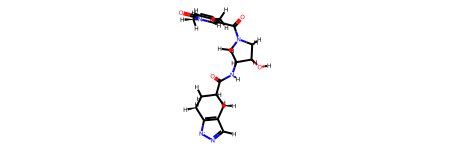

In [18]:
# visualise the binding pose
poses[0].as_rd_mol()

## single ligand section

In [53]:
# Extract the 'sdf' column from the dataframe created earlier
sdf_column = df['sdf']

# Get the SDF data from the 3RD row
sdf_data = sdf_column.iloc[2]

# Write the SDF data to a file for pose analysis
with open('./data/Poses/SDF_poses/Ligand.sdf', 'w') as file:
    file.write(sdf_data)

In [65]:
# convert the SDF file to a PDB file
supplier = Chem.SDMolSupplier("./data/Poses/SDF_poses/Ligand.sdf", removeHs=False)
mol = supplier[0]  # Assuming you have one molecule in the file

# Write to PDB
with open("./data/Poses/PDB_poses/Ligand.pdb", "w") as f:
    f.write(Chem.MolToPDBBlock(mol))

In [70]:
# Initialize PDBParser and PDBIO
parser = PDB.PDBParser(QUIET=True)
io = PDB.PDBIO()

# Load protein and ligand PDB files
protein_structure = parser.get_structure('protein', './data/Receptor files/7vhy-noligand.pdb')
ligand_structure = parser.get_structure('ligand', './data/Poses/PDB_poses/Ligand.pdb')

# Combine structures (using the first model)
protein_model = protein_structure[0]
ligand_model = ligand_structure[0]

# Ensure unique chain IDs for both structures
for chain in ligand_model:
    chain.id = 'L'  # Assign a unique chain ID for the ligand
    protein_model.add(chain)  # Add ligand chains to the protein model

# Save the combined structure
io.set_structure(protein_structure)  # Set the protein structure which now includes the ligand
io.save('./data/Poses docked with 7vhy/combined_structure.pdb')

## Multi pose section

In [60]:
# Load the first 10 ligands and obtain SDF files
# Extract the 'sdf' column from the dataframe
sdf_column = grouped_df['sdf']

# Loop over the first 10 rows and write each SDF to a separate file
for i in range(10):
    sdf_data = sdf_column.iloc[i]
    with open(f'./data/Poses/SDF_poses/Ligand_{i+1}.sdf', 'w') as file:
        file.write(sdf_data)

In [61]:
# convert the obtained ligands to PDBs
for i in range(10):
    sdf_file = f'./data/Poses/SDF_poses/Ligand_{i+1}.sdf'
    pdb_file = f'./data/Poses/PDB_poses/Ligand_{i+1}.pdb'

    # Read the SDF file
    supplier = Chem.SDMolSupplier(sdf_file, removeHs=False)
    mol = supplier[0]  # Assuming one molecule per file

    # Write to PDB file
    with open(pdb_file, "w") as f:
        f.write(Chem.MolToPDBBlock(mol))

In [82]:
# Unfortunately still manual untill further notice...
parser = PDB.PDBParser(QUIET=True)
io = PDB.PDBIO()

# Load protein and ligand PDB files
protein_structure = parser.get_structure('protein', './data/Receptor files/7vhy-noligand-nowater.pdb')
ligand_structure = parser.get_structure('ligand', './data/Poses/PDB_poses/Ligand_10.pdb')

# Combine structures (using the first model)
protein_model = protein_structure[0]
ligand_model = ligand_structure[0]

# Ensure unique chain IDs for both structures
for chain in ligand_model:
    chain.id = 'L'  # Assign a unique chain ID for the ligand
    protein_model.add(chain)  # Add ligand chains to the protein model

# Save the combined structure
io.set_structure(protein_structure)  # Set the protein structure which now includes the ligand
io.save('./data/Poses docked with 7vhy/combined_structure_10.pdb')

## Extra's

In [19]:
view = nglview.show_rdkit(poses[0].as_rd_mol())  # load "3pqr" from RCSB PDB and display viewer widget
view

NGLWidget()

In [20]:
poses[0].props

{'vina_energy_torsions': '2.758',
 'SMILES': '[H]O[C@@]1([H])C([H])([H])N(C(=O)c2c(C([H])([H])[H])c([H])c(=O)n(C([H])([H])[H])c2[H])C([H])([H])[C@]1([H])N([H])C(=O)C1([H])C([H])([H])c2c([H])n[n-]c2C([H])([H])C1([H])[H]',
 'SpockStorage_poses_representations_ID_before_change': 'SpockStorage_poses_representations_library_88bde28ec4a6443caec98b23b0143271_0',
 'sdf': '\n     RDKit          3D\n\n 53 56  0  0  0  0  0  0  0  0999 V2000\n  -10.9860  -10.9950   15.1920 C   0  0  0  0  0  0  0  0  0  0  0  0\n  -11.6560  -11.0110   13.8590 C   0  0  0  0  0  0  0  0  0  0  0  0\n  -12.9880  -10.6760   13.7370 C   0  0  0  0  0  0  0  0  0  0  0  0\n  -13.5940  -10.6980   12.4910 C   0  0  0  0  0  0  0  0  0  0  0  0\n  -14.8210  -10.3860   12.3930 O   0  0  0  0  0  0  0  0  0  0  0  0\n  -12.9400  -11.0340   11.3640 N   0  0  0  0  0  0  0  0  0  0  0  0\n  -13.6090  -11.0460   10.0650 C   0  0  0  0  0  0  0  0  0  0  0  0\n  -11.6420  -11.3620   11.4790 C   0  0  0  0  0  0  0  0  0  0  0 

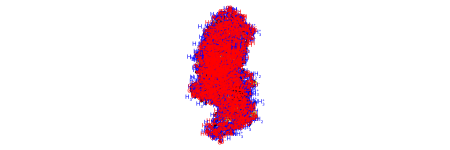

In [21]:
complex = store.get_complex_for_pose(pose_id=poses[0].id)
complex

In [23]:
complex_graph = store.targets[0].graph + poses[0].graph
complex_graph
plotly_molecular_graph(
    complex_graph.nx, 
    colour_nodes_by='entity', 
    colour_edges_by='type',
    plot_title='07dc2a5690da437bb34203e70e1c13a8_3 bound with 7vhy',
    figsize=(1000, 1000),
    node_size_min=10,
    node_size_multiplier=1,
    )

In [32]:
# Check Vina energies of the top 10
grouped_df.head(10)['vina_energy_total']

5721   -10.491
1995   -10.484
3111   -10.365
2104   -10.263
1826   -10.252
3156   -10.232
288    -10.224
5334   -10.213
2625   -10.212
3311   -10.191
Name: vina_energy_total, dtype: float64

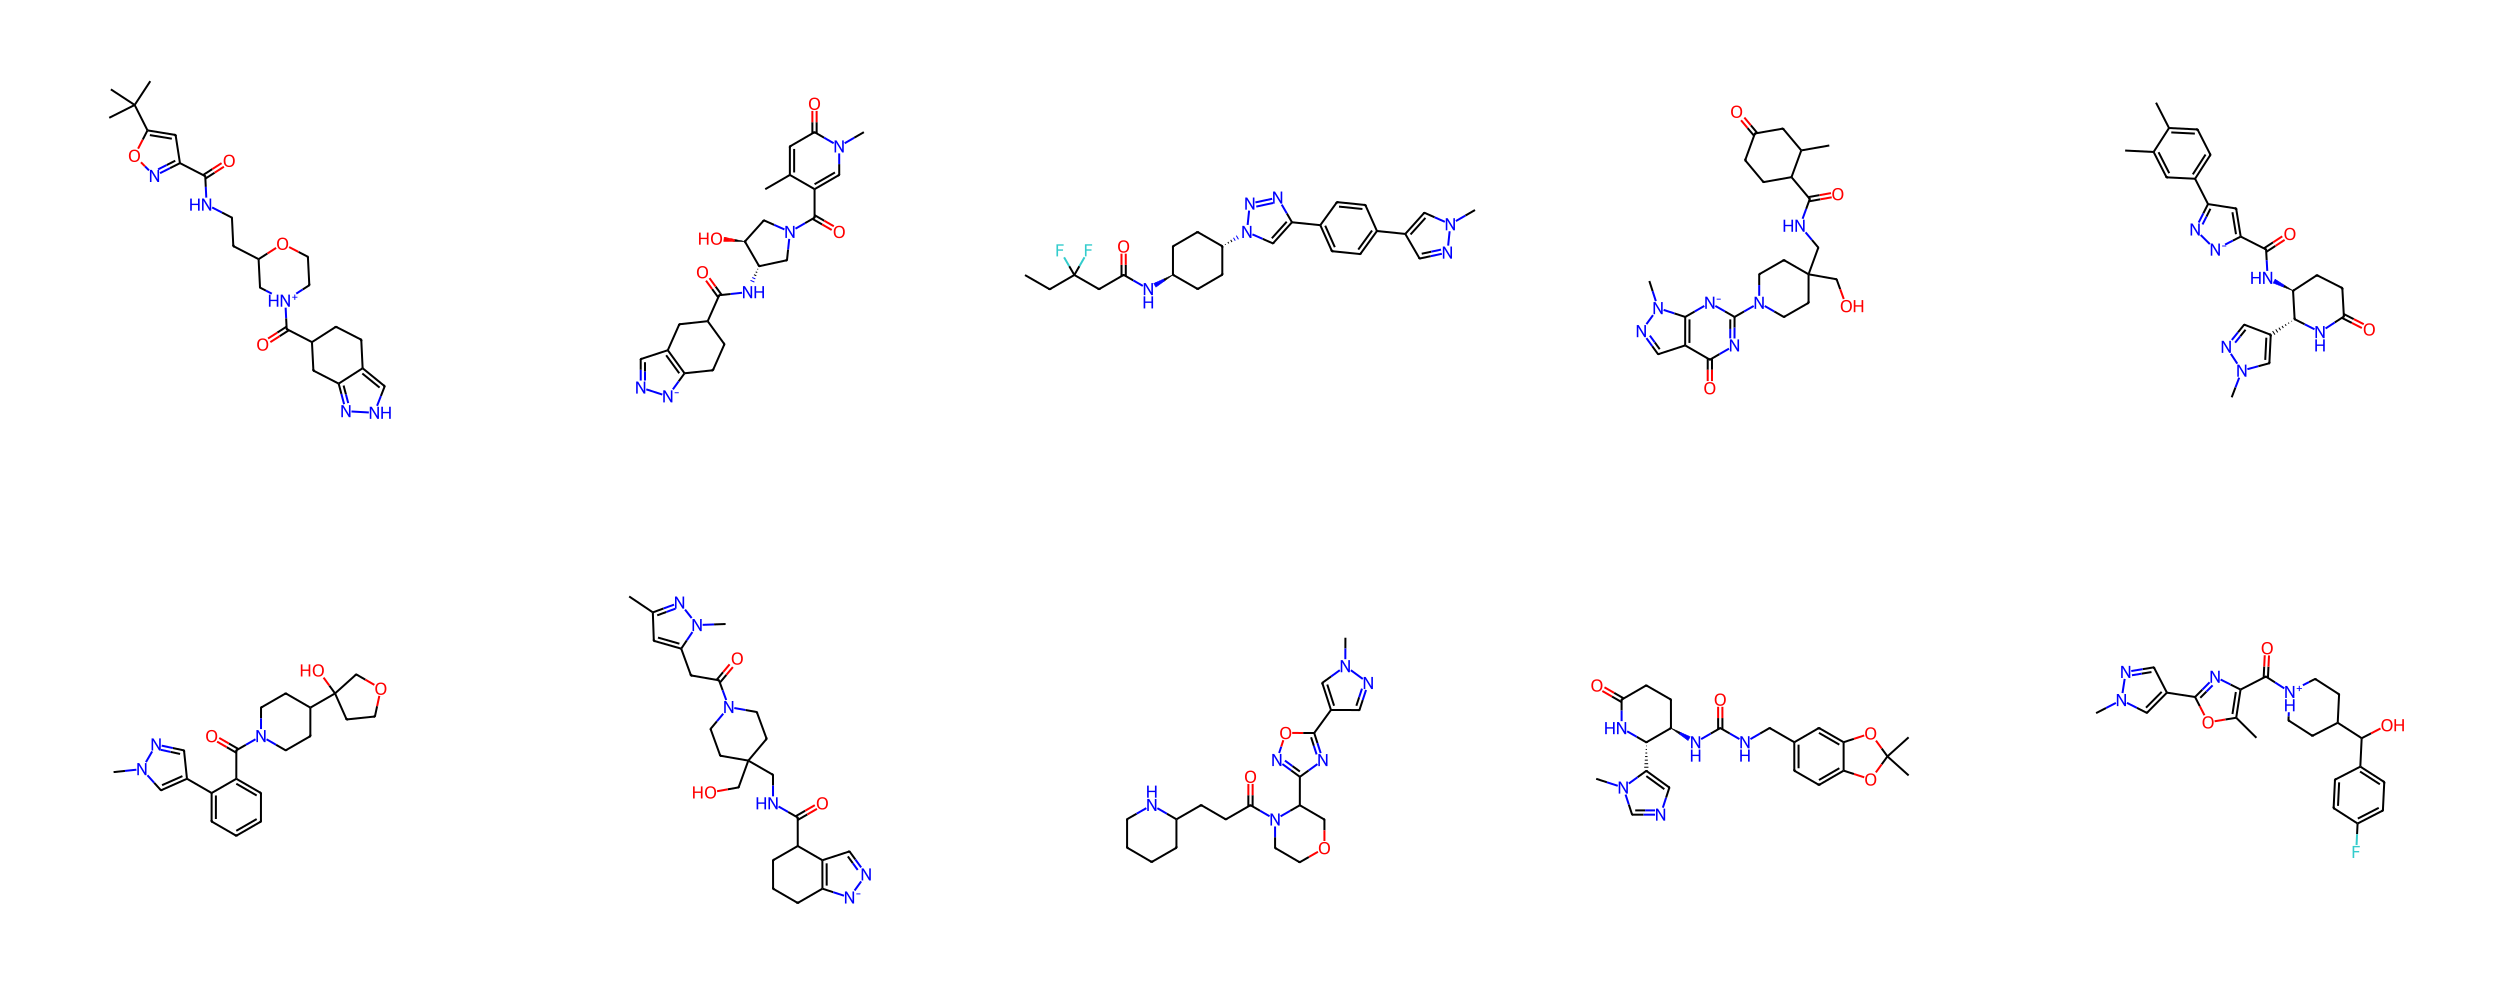

In [55]:
# get the 2D structure of the top 10 moleucles

# Extract the top 10 SMILES strings
top10_smiles = grouped_df['SMILES'].head(10).tolist()

# Convert to RDKit molecules
molecules = [Chem.MolFromSmiles(smiles) for smiles in top10_smiles]

# Draw the molecules in a grid and save as PNG
# Draw the molecules in a grid with larger individual images
img = Draw.MolsToGridImage(molecules, molsPerRow=5, subImgSize=(500, 500))  # Increased size
img

In [56]:
with open("./Results/PNGs/PNGstop10_molecules.png", "wb") as png:
    png.write(img.data)